

***Churn and Retention Rate***


In [3]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/My Drive/cohort try/Amazon_Dataset.csv", decimal = '.')

In [8]:
df=df[(df['event_type']=='purchase')]

In [9]:
df.loc[pd.isnull(df.category_code),'category_code'] = 'Other.Other'
df['category_id_new'] = df['category_id']
df.loc[(df.category_code == 'Other.Other'),'category_id'] = 4444443555631882655
df.loc[pd.isnull(df.brand),'brand'] = 'Unknown'

In [10]:
import datetime
df['event_time'] = pd.to_datetime(df['event_time']).dt.date

In [11]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new
162,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2053013555631882655
308,2019-10-01,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2053013555631882655
379,2019-10-01,purchase,5100816,4444443555631882655,Other.Other,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56,2053013553375346967
442,2019-10-01,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f,2053013557418656265
574,2019-10-01,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,2053013554658804075


In [13]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
 grouped = df.groupby('user_id')

In [15]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [16]:
grouped_single= df.groupby('user_id').agg({'event_time':['min']})

In [18]:
grouped_single.columns = [ 'signup_date']

In [19]:
grouped_single = grouped_single.reset_index()

In [20]:
grouped_single.head(5)

,user_id,signup_date
0,264649825,2019-10-06
1,303160429,2019-10-13
2,340041246,2019-10-03
3,371877401,2019-10-09
4,384989212,2019-10-18


In [21]:
grouped_single.shape

(347118, 2)

In [22]:

#merged_df= pd.concat([df, grouped_single], axis=1, join='left')
merged_df = pd.merge(left=df, right=grouped_single, left_on='user_id', right_on='user_id')

In [23]:
merged_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new,signup_date
0,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2053013555631882655,2019-10-01
1,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,3591a683-59b0-41d0-94b7-fbc381401119,2053013555631882655,2019-10-01
2,2019-10-02,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,543272936,4ab63ddd-717a-435b-93cd-934176ecfc0e,2053013555631882655,2019-10-01
3,2019-10-02,purchase,11300010,2053013555531219353,electronics.telephone,panasonic,40.39,543272936,d5de376a-9d8a-4e66-9fcd-74d00a384daa,2053013555531219353,2019-10-01
4,2019-10-02,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,543272936,5fa53005-2891-4880-a4ac-aa039b71c37c,2053013555631882655,2019-10-01


In [27]:
df2['seniority'] = (df2['event_time'] - df2['signup_date']).dt.days + 1

df2.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new,signup_date,seniority
0,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2053013555631882655,2019-10-01,1
1,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,3591a683-59b0-41d0-94b7-fbc381401119,2053013555631882655,2019-10-01,1
2,2019-10-02,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,543272936,4ab63ddd-717a-435b-93cd-934176ecfc0e,2053013555631882655,2019-10-01,2
3,2019-10-02,purchase,11300010,2053013555531219353,electronics.telephone,panasonic,40.39,543272936,d5de376a-9d8a-4e66-9fcd-74d00a384daa,2053013555531219353,2019-10-01,2
4,2019-10-02,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,543272936,5fa53005-2891-4880-a4ac-aa039b71c37c,2053013555631882655,2019-10-01,2
5,2019-10-03,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,543272936,79ac06be-567a-45b6-a806-6863824d5355,2053013555631882655,2019-10-01,3
6,2019-10-03,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,132.15,543272936,3cbc757a-fcd2-431d-90b1-e99c95d4ed92,2053013555631882655,2019-10-01,3
7,2019-10-04,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,132.05,543272936,f2a225f5-a8db-4618-a8c9-22c6e135d20f,2053013555631882655,2019-10-01,4
8,2019-10-05,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,132.05,543272936,217ec794-5d89-46ff-b68a-b277a33cf82d,2053013555631882655,2019-10-01,5
9,2019-10-06,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,131.79,543272936,74a11a28-f540-4906-82cd-7d43aebc2b49,2053013555631882655,2019-10-01,6


In [28]:
group = df2.groupby(['signup_date', 'seniority'])

cohort_data = group['user_id'].size()

cohort_data = cohort_data.reset_index()

cohort_data


,signup_date,seniority,user_id
0,2019-10-01,1,19307
1,2019-10-01,2,2952
2,2019-10-01,3,2289
3,2019-10-01,4,2470
4,2019-10-01,5,1864
...,...,...,...
491,2019-10-29,2,847
492,2019-10-29,3,471
493,2019-10-30,1,10456
494,2019-10-30,2,789


In [29]:
group.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new,signup_date,seniority
0,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2053013555631882655,2019-10-01,1
1,2019-10-01,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,3591a683-59b0-41d0-94b7-fbc381401119,2053013555631882655,2019-10-01,1
2,2019-10-02,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,543272936,4ab63ddd-717a-435b-93cd-934176ecfc0e,2053013555631882655,2019-10-01,2
3,2019-10-02,purchase,11300010,2053013555531219353,electronics.telephone,panasonic,40.39,543272936,d5de376a-9d8a-4e66-9fcd-74d00a384daa,2053013555531219353,2019-10-01,2
4,2019-10-02,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.25,543272936,5fa53005-2891-4880-a4ac-aa039b71c37c,2053013555631882655,2019-10-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...
732924,2019-10-31,purchase,1004833,2053013555631882655,electronics.smartphone,samsung,172.22,565938658,fd0d3217-2ea2-4c12-8603-9515b65bded1,2053013555631882655,2019-10-31,1
732925,2019-10-31,purchase,1005073,2053013555631882655,electronics.smartphone,samsung,1133.53,565706295,b3ede613-6c9b-4da3-b0ee-7e748362457d,2053013555631882655,2019-10-31,1
732926,2019-10-31,purchase,1005135,2053013555631882655,electronics.smartphone,apple,1674.37,533247443,fc98d606-5036-4caf-903d-e65dafd7019e,2053013555631882655,2019-10-31,1
732927,2019-10-31,purchase,1005115,2053013555631882655,electronics.smartphone,apple,959.28,533247443,fc98d606-5036-4caf-903d-e65dafd7019e,2053013555631882655,2019-10-31,1


In [30]:
type(cohort_data)

pandas.core.frame.DataFrame

In [34]:
cohort_data=cohort_data.rename(columns={'Seniority': 'seniority'})


In [35]:
cohort_data.head(5)

,signup_date,seniority,user_id
0,2019-10-01,1,19307
1,2019-10-01,2,2952
2,2019-10-01,3,2289
3,2019-10-01,4,2470
4,2019-10-01,5,1864


In [36]:
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='user_id')
base = cohort_counts[1]

# We apply the divide method to our cohort_counts, dividing it by the base
retention = cohort_counts.divide(base, axis=0).round(3)

In [37]:
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
signup_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01,19307.0,2952.0,2289.0,2470.0,1864.0,1647.0,1705.0,1722.0,1560.0,1401.0,1522.0,1255.0,1429.0,1728.0,1453.0,1567.0,1539.0,1352.0,1125.0,1067.0,1250.0,1095.0,1100.0,1066.0,1082.0,934.0,901.0,917.0,871.0,854.0,903.0
2019-10-02,16517.0,1787.0,1832.0,1324.0,1080.0,1074.0,1037.0,1023.0,970.0,1067.0,798.0,951.0,1110.0,1005.0,1100.0,1024.0,872.0,689.0,669.0,697.0,692.0,719.0,612.0,631.0,565.0,569.0,559.0,595.0,552.0,531.0,NaN
2019-10-03,15179.0,1939.0,1169.0,970.0,958.0,950.0,893.0,849.0,859.0,761.0,742.0,867.0,804.0,950.0,837.0,688.0,569.0,518.0,535.0,595.0,510.0,553.0,558.0,453.0,493.0,440.0,459.0,454.0,470.0,NaN,NaN
2019-10-04,20800.0,1990.0,1268.0,1174.0,1131.0,904.0,888.0,953.0,940.0,930.0,1126.0,1072.0,1079.0,946.0,804.0,746.0,752.0,751.0,771.0,681.0,662.0,689.0,588.0,587.0,533.0,459.0,518.0,430.0,NaN,NaN,NaN
2019-10-05,17147.0,1405.0,915.0,829.0,752.0,622.0,790.0,669.0,757.0,816.0,677.0,787.0,650.0,601.0,596.0,500.0,467.0,474.0,521.0,474.0,461.0,397.0,423.0,322.0,347.0,369.0,303.0,NaN,NaN,NaN,NaN
2019-10-06,15801.0,1366.0,817.0,745.0,694.0,685.0,593.0,697.0,647.0,625.0,615.0,539.0,472.0,440.0,491.0,428.0,420.0,426.0,405.0,392.0,361.0,389.0,367.0,305.0,289.0,275.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,14186.0,1382.0,923.0,747.0,664.0,627.0,557.0,667.0,645.0,584.0,494.0,479.0,385.0,436.0,454.0,484.0,473.0,305.0,357.0,351.0,356.0,329.0,265.0,269.0,298.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,15204.0,1298.0,806.0,799.0,636.0,690.0,763.0,635.0,759.0,626.0,592.0,495.0,433.0,487.0,428.0,383.0,404.0,373.0,331.0,301.0,311.0,311.0,343.0,322.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,14650.0,1222.0,882.0,743.0,685.0,749.0,602.0,631.0,582.0,544.0,448.0,429.0,486.0,405.0,447.0,399.0,351.0,296.0,329.0,303.0,308.0,321.0,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
retention = cohort_counts.divide(base,axis=0).round(3)
retention

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
signup_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01,1.0,0.153,0.119,0.128,0.097,0.085,0.088,0.089,0.081,0.073,0.079,0.065,0.074,0.090,0.075,0.081,0.080,0.070,0.058,0.055,0.065,0.057,0.057,0.055,0.056,0.048,0.047,0.047,0.045,0.044,0.047
2019-10-02,1.0,0.108,0.111,0.080,0.065,0.065,0.063,0.062,0.059,0.065,0.048,0.058,0.067,0.061,0.067,0.062,0.053,0.042,0.041,0.042,0.042,0.044,0.037,0.038,0.034,0.034,0.034,0.036,0.033,0.032,NaN
2019-10-03,1.0,0.128,0.077,0.064,0.063,0.063,0.059,0.056,0.057,0.050,0.049,0.057,0.053,0.063,0.055,0.045,0.037,0.034,0.035,0.039,0.034,0.036,0.037,0.030,0.032,0.029,0.030,0.030,0.031,NaN,NaN
2019-10-04,1.0,0.096,0.061,0.056,0.054,0.043,0.043,0.046,0.045,0.045,0.054,0.052,0.052,0.045,0.039,0.036,0.036,0.036,0.037,0.033,0.032,0.033,0.028,0.028,0.026,0.022,0.025,0.021,NaN,NaN,NaN
2019-10-05,1.0,0.082,0.053,0.048,0.044,0.036,0.046,0.039,0.044,0.048,0.039,0.046,0.038,0.035,0.035,0.029,0.027,0.028,0.030,0.028,0.027,0.023,0.025,0.019,0.020,0.022,0.018,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.086,0.052,0.047,0.044,0.043,0.038,0.044,0.041,0.040,0.039,0.034,0.030,0.028,0.031,0.027,0.027,0.027,0.026,0.025,0.023,0.025,0.023,0.019,0.018,0.017,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.097,0.065,0.053,0.047,0.044,0.039,0.047,0.045,0.041,0.035,0.034,0.027,0.031,0.032,0.034,0.033,0.022,0.025,0.025,0.025,0.023,0.019,0.019,0.021,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.085,0.053,0.053,0.042,0.045,0.050,0.042,0.050,0.041,0.039,0.033,0.028,0.032,0.028,0.025,0.027,0.025,0.022,0.020,0.020,0.020,0.023,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.083,0.060,0.051,0.047,0.051,0.041,0.043,0.040,0.037,0.031,0.029,0.033,0.028,0.031,0.027,0.024,0.020,0.022,0.021,0.021,0.022,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


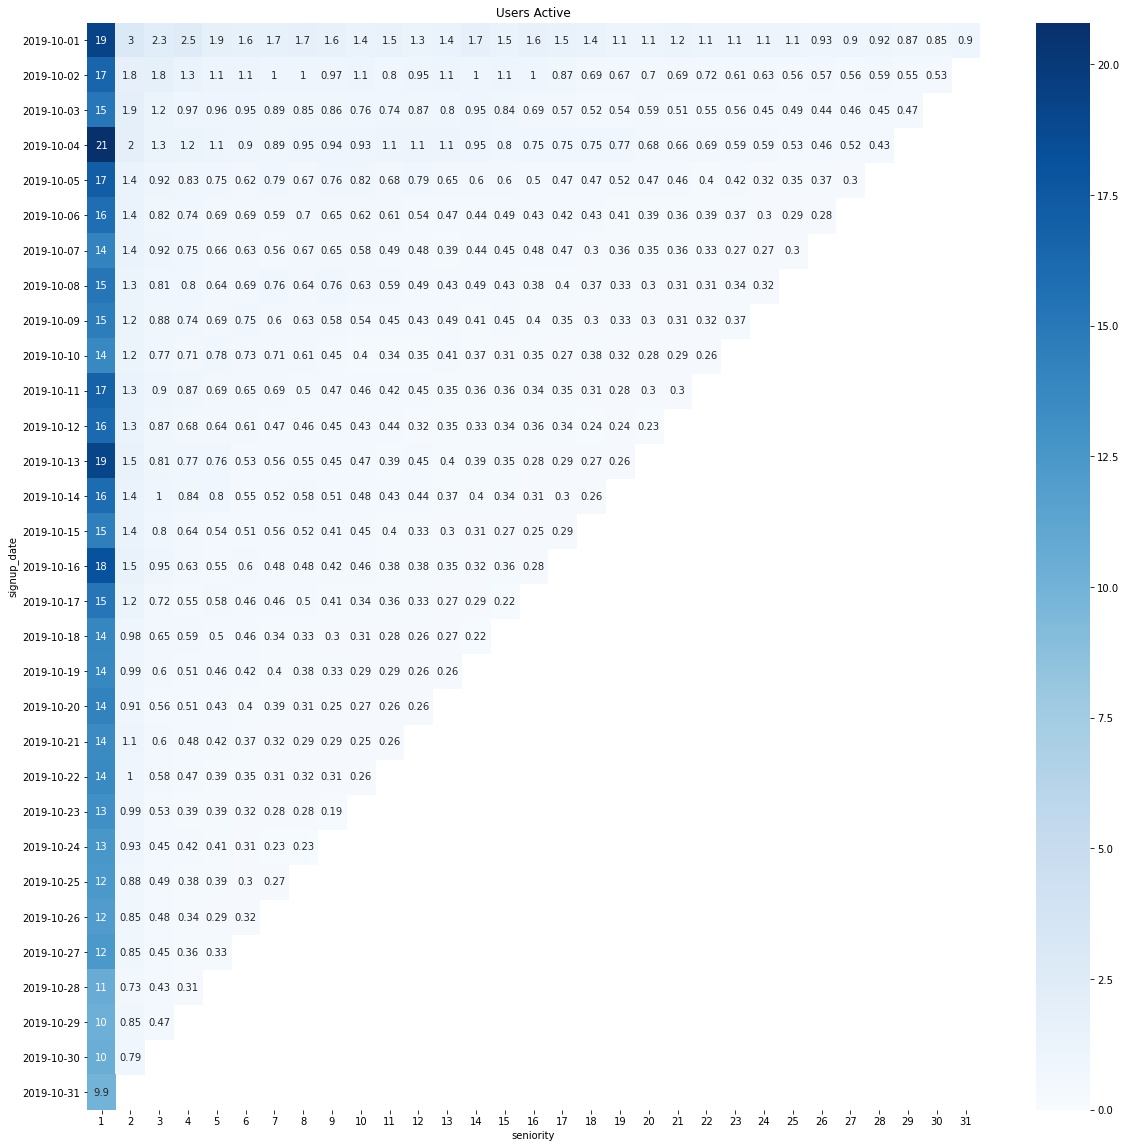

In [43]:
# User Count heatmap
plt.figure(figsize=(20,20))
plt.title('Users Active')
ax = sns.heatmap(data=cohort_counts/1000, annot=True, vmin=0.0,cmap='Blues')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")

plt.show()

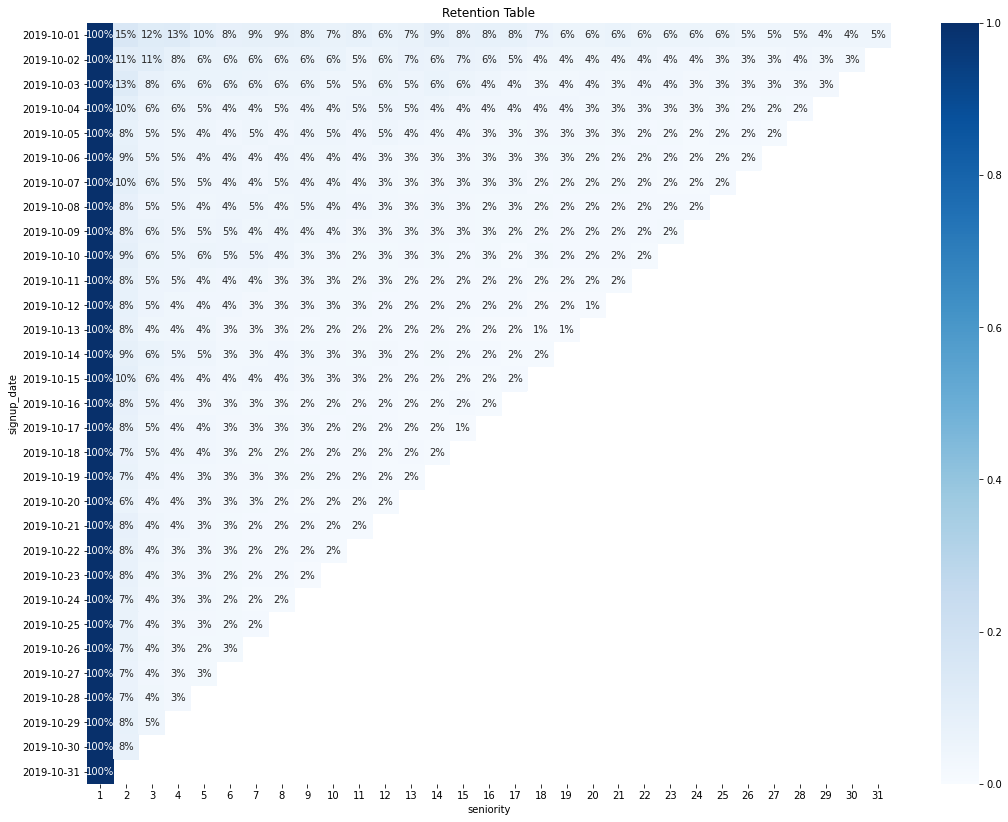

In [44]:
# Retention Rate heatmap
plt.figure(figsize=(18,14))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Blues')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")

plt.show()